# Experimento Marcas de Pipoca
## Projeto da disciplina **SME0810 - Métodos Não Paramétricos**

## Membros

* Alexandre Eduardo de Souza Jesus - alexandre_souza@usp.br - 12559506

* Gustavo Silva de Oliveira - gustavo.oliveira03@usp.br - 12567231

* Lucas Ivars Cadima Ciziks - luciziks@usp.br - 125599472

* Pedro Henrique de Freitas Maçonetto - pedromaconetto@usp.br - 12675419

* Paloma Botto de Medeiros Barbosa - palomabotto@usp.br - 12689641

## Introdução

### Descrição do experimento

O grupo escolheu o experimento 1, dentre oito opções, cuja descrição é: “Considere quatro diferentes marcas de milho de pipoca. Selecione 5 amostras de cada marca com 100 grãos de milho. Enumere as amostras de 1 até 20 e faça um sorteio aleatório de cada amostra para a ordem do cozimento. Utilize como ingrediente 1 colher de sopa de óleo de cozinhar. Colocar o óleo na panela, ligar o fogo baixo (temperatura mínima) e esperar 1 minuto. Após esse tempo, é hora de retirar a panela do fogo e só então colocar o milho. Misture rapidinho o milho no óleo, de maneira que todos fiquem engordurados e espere por 30 segundos com todo o milho na panela e fora do fogo para só então levar a panela de volta para o fogão, mexendo um pouco e deixando a tampa um pouquinho aberta. Considere um tempo de cozimento fixo para todas as amostras, o suficiente para estourar o máximo de grãos. Ao terminar cada amostra conte o número de grãos de milho que não estouraram de forma satisfatória, em seguida lave bem a panela com água fria e repita o experimento para a próxima amostra sorteada. Monte uma tabela com o número de grãos que não estouraram em cada amostra com cada marca. Responda se há diferença no número médio de grãos que não estouraram para as diferentes marcas. Considere o nível de significância de α = 5%.”

### Definição do problema, objetivos e hipóteses a serem testadas

Quer-se verificar se as marcas mais conhecidas do mercado são as que tem um melhor desempenho no teste, ou seja, se são as que possuem menos milhos de pipoca que não estouraram. 

Sendo assim, o objetivo do experimento é inferir, a partir de testes de hipóteses não paramétricos, se o número médio de milhos de pipoca não estourados é o mesmo para todas as marcas ou não. Isso implica que as amostras provêm de mesma população, o que significa que suas medidas de dispersão e descritivas, como variância e média, são iguais.

As hipóteses testadas foram:


$$
\begin{cases}
H_0: \text{O número médio de pipocas não estouradas é igual para todas as marcas.} \\
H_1: \text{O número médio de pipocas não estouradas NÃO é igual para todas as marcas.}
\end{cases}
$$

## Metodologia

### Variáveis de estudo

As marcas utilizadas no experimento foram:

* Yoki;
* Yoki Premium;
* Siamar;
* Hikari.

### Método de análise

Por se tratar de variáveis independentes, verificamos que o teste adequado para o nosso problema é o Teste de Kruskal-Wallis, que tem por sua finalidade decidir se k amostras independentes (no nosso caso, 4 amostras) podem ter sido extraídas da mesma população.

## Resultados e discussões

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import kruskal

### Coletando Dados

In [12]:
experiment_data = pd.read_csv("Experimento.csv", encoding="utf-8", delimiter=";")
experiment_data.head()

,Amostra,# Pipocas Nao Estouradas,Marca
0,1,27,Yoki Premium
1,2,72,Yoki Premium
2,3,10,Yoki Premium
3,4,48,Yoki Premium
4,5,17,Yoki Premium


### Análise Exploratória dos Dados

### Medidas Descritivas

In [13]:
# Função para calcular o coeficiente de variância (CV)
def coeficiente_variancia(table):
    return 100 * table.std() / table.mean()

# Função para calcular a amplitude
def amplitude(table):
    return table.max() - table.min()

# Encontrando medidas descritivas por Marca
medidas_descritivas = experiment_data.groupby("Marca")["# Pipocas Nao Estouradas"].agg(["min", "max", "mean", "median", "var", "std", coeficiente_variancia, amplitude])

# Renomeando nomes das medidas
novos_nomes = {
    "min":"Mínimo",
    "max": "Máximo",
    "mean":"Média",
    "median": "Mediana",
    "var": "Variância",
    "std": "Desvio-padrão",
    "coeficiente_variancia":"Coeficiente de Variância",
    "amplitude": "Amplitude"
}

medidas_descritivas = medidas_descritivas.T.rename(novos_nomes)

# Exibindo medidas descritivas
medidas_descritivas.T

,Mínimo,Máximo,Média,Mediana,Variância,Desvio-padrão,Coeficiente de Variância,Amplitude
Marca,,,,,,,,
Hikari,9.0,43.0,25.2,25.0,236.2,15.368800,60.987300,34.0
Siamar,8.0,29.0,22.4,25.0,72.3,8.502941,37.959557,21.0
Yoki,11.0,37.0,21.4,19.0,122.3,11.058933,51.677257,26.0
Yoki Premium,10.0,72.0,34.8,27.0,637.7,25.252723,72.565295,62.0


### Boxplots

Text(0.5, 1.0, 'Boxplots por Marca')

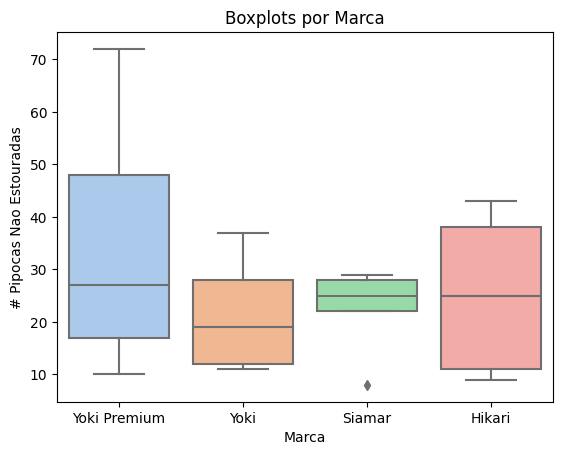

In [14]:
sns.boxplot(x="Marca", y="# Pipocas Nao Estouradas", data=experiment_data, palette=sns.color_palette('pastel')[0:4]).set_title('Boxplots por Marca')

### Histogramas

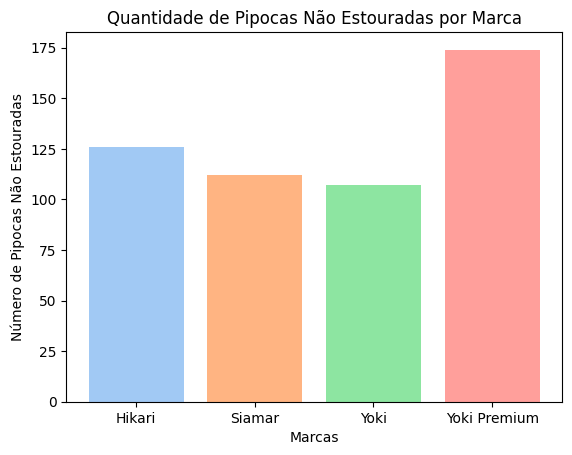

In [15]:
pipocas_por_marca = experiment_data.groupby(by="Marca", as_index=False).sum()

plt.bar(x=pipocas_por_marca.Marca, 
    height=pipocas_por_marca["# Pipocas Nao Estouradas"], 
    color=sns.color_palette('pastel')[0:4]
    )

plt.title("Quantidade de Pipocas Não Estouradas por Marca")
plt.xlabel('Marcas')
plt.ylabel('Número de Pipocas Não Estouradas')

plt.show()

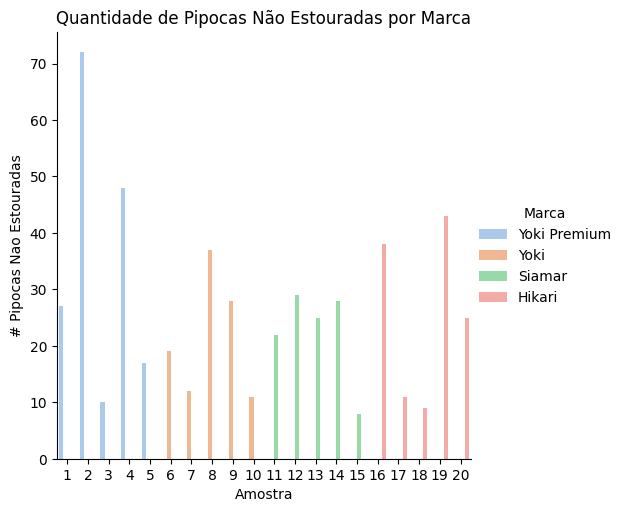

In [20]:
sns.catplot(kind="bar", x='Amostra', y='# Pipocas Nao Estouradas', hue='Marca', data=experiment_data, palette=sns.color_palette('pastel')[0:4])

plt.title("Quantidade de Pipocas Não Estouradas por Marca")

plt.show()

### Gráfico de Pizza

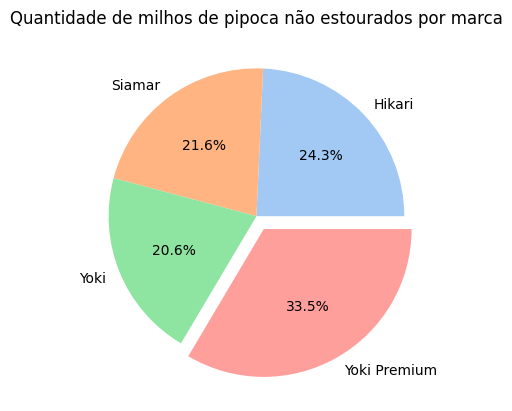

In [17]:
marcas = ['Hikari', 'Siamar', 'Yoki', 'Yoki Premium']
data = experiment_data.groupby("Marca")['# Pipocas Nao Estouradas'].sum()
explode = (0, 0, 0, 0.1)
colors = sns.color_palette('pastel')[0:4]

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=marcas, autopct='%1.1f%%', explode=explode, colors=colors)
plt.title('Quantidade de milhos de pipoca não estourados por marca')
plt.show()

### Teste de Kruskal-Wallis

$$
\begin{cases}
H_0: \text{O número médio de pipocas não estouradas é igual para todas as marcas.} \\
H_1: \text{O número médio de pipocas não estouradas NÃO é igual para todas as marcas.}
\end{cases}
$$

In [18]:
# Separando amostras
hikari = experiment_data[experiment_data["Marca"] == "Hikari"]["# Pipocas Nao Estouradas"]
yoki_premium = experiment_data[experiment_data["Marca"] == "Yoki Premium"]["# Pipocas Nao Estouradas"]
yoki = experiment_data[experiment_data["Marca"] == "Yoki"]["# Pipocas Nao Estouradas"]
siamar = experiment_data[experiment_data["Marca"] == "Siamar"]["# Pipocas Nao Estouradas"]

In [19]:
statistic, p_value = kruskal(hikari, yoki_premium, yoki, siamar)
print(f'Valor da estatística de teste: {statistic} \np-valor: {p_value}')

Valor da estatística de teste: 0.601356443104749 
p-valor: 0.8961217765753576


### Fotos do experimento

![image](foto_1.jpg)

![image](foto_2.jpg)

![image](foto_3.jpg)

![image](foto_4.jpg)

## Conclusão

### Comentários e conclusões

Ao observar os dados, uma conclusão inicial e precipitada seria que a marca “Yoki Premium” é a pior, visto que foi a com menos grãos estourados.

Todavia, de acordo com os resultados obtidos a partir do teste, é possível concluir que, ao nível de 5% de significância, **não se rejeita** a hipótese nula de que o número médio de pipocas mão estouradas é igual para todas as marcas, ou seja, a diferença apresentadas nas amostras da marca “Yoki Premium” não é estatisticamente significante. 
